In [1]:
from PIL import Image
import torch

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [2]:
from bbox_detector.model import BBoxDetector
from bbox_detector.inference import inference as bbox_inference
from bbox_detector.train import load_checkpoint as bbox_load_checkpoint
from bbox_detector.utils import show_image

from char_recognizer.model import CharRecognizer
from char_recognizer.inference import inference as char_inference
from char_recognizer.inference import get_top_combinations
from char_recognizer.train import load_checkpoint as char_load_checkpoint


In [28]:
bbox_model = BBoxDetector(dropout_rate=0.4, device=device).to(device)
epoch, train_loss_history, val_loss_history, precision_recall_history = bbox_load_checkpoint('bbox_detector/checkpoints/model_epoch_40.pth', bbox_model, weights_only=False)

char_model = CharRecognizer(dropout_rate=0.4, device=device).to(device)
epoch, train_loss_history, val_loss_history = char_load_checkpoint('char_recognizer/checkpoints/model_epoch_35.pth', char_model, weights_only=False)

Checkpoint loaded from bbox_detector/checkpoints/model_epoch_40.pth, Epoch: 40
Checkpoint loaded from char_recognizer/checkpoints/model_epoch_35.pth, Epoch: 35


In [29]:
image_path = '../datasets/dataset_v5/200.jpg'
image = Image.open(image_path).convert("RGB")

In [30]:
boxes, scores = bbox_inference(bbox_model, image, device, conf_threshold=0.95, nms_threshold=0.30)

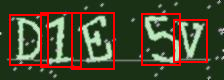

In [31]:
show_image(image, boxes)

In [32]:
sorted_boxes = sorted(boxes, key=lambda box: box[0])

In [33]:
chars_list = []
for i in range(len(boxes)):
    chars = char_inference(char_model, image, sorted_boxes[i], device)
    chars_list.append(chars)

In [34]:
top_combinations = get_top_combinations(chars_list, 3)

In [35]:
for i, combination in enumerate(top_combinations):
    print(f"Combination {i + 1}: {''.join([c for c, p in top_combinations[i][0]])}, probability: {top_combinations[i][1]}")

Combination 1: D1E5V, probability: 0.1793656284442438
Combination 2: D1E5Y, probability: 0.07949218947972742
Combination 3: D1E5W, probability: 0.07835954001918284


In [20]:
[''.join([c for c, p in top_combinations[i][0]]) for i in range(len(top_combinations))]

['UNHT8', 'UMHT8', 'HNHT8']